In [ ]:
import bs4 as bs
import requests
import pandas as pd
import pandas_datareader.data as web
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def get_tickers():
    resp=requests.get('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
    soup=bs.BeautifulSoup(resp.text)
    table=soup.find('table',{'class':'wikitable sortable'})
    tickers=[]
    for row in table.findAll('tr')[1:]:
        ticker= row.findAll('td')[0].text
        tickers.append(ticker)
    return tickers

t=get_tickers()
tickers=[]
for tick in t:
    tickers.append(tick.split('\n')[0])
print(tickers)

['MMM', 'AOS', 'ABT', 'ABBV', 'ABMD', 'ACN', 'ATVI', 'ADBE', 'AAP', 'AES', 'AFL', 'A', 'AIG', 'APD', 'AKAM', 'ALK', 'ALB', 'ARE', 'ALGN', 'ALLE', 'LNT', 'ALL', 'GOOGL', 'GOOG', 'MO', 'AMZN', 'AMCR', 'AMD', 'AEE', 'AAL', 'AEP', 'AXP', 'AMT', 'AWK', 'AMP', 'ABC', 'AME', 'AMGN', 'APH', 'ADI', 'ANSS', 'ANTM', 'AON', 'APA', 'AAPL', 'AMAT', 'APTV', 'ADM', 'ANET', 'AJG', 'AIZ', 'T', 'ATO', 'ADSK', 'ADP', 'AZO', 'AVB', 'AVY', 'BKR', 'BLL', 'BAC', 'BBWI', 'BAX', 'BDX', 'BRK.B', 'BBY', 'BIO', 'TECH', 'BIIB', 'BLK', 'BK', 'BA', 'BKNG', 'BWA', 'BXP', 'BSX', 'BMY', 'AVGO', 'BR', 'BRO', 'BF.B', 'CHRW', 'CDNS', 'CZR', 'CPB', 'COF', 'CAH', 'KMX', 'CCL', 'CARR', 'CTLT', 'CAT', 'CBOE', 'CBRE', 'CDW', 'CE', 'CNC', 'CNP', 'CDAY', 'CERN', 'CF', 'CRL', 'SCHW', 'CHTR', 'CVX', 'CMG', 'CB', 'CHD', 'CI', 'CINF', 'CTAS', 'CSCO', 'C', 'CFG', 'CTXS', 'CLX', 'CME', 'CMS', 'KO', 'CTSH', 'CL', 'CMCSA', 'CMA', 'CAG', 'COP', 'ED', 'STZ', 'COO', 'CPRT', 'GLW', 'CTVA', 'COST', 'CTRA', 'CCI', 'CSX', 'CMI', 'CVS', 'DHI', '

In [ ]:
tickers=['MMM', 'AOS', 'ABT', 'ABBV', 'ABMD', 'ACN', 'ATVI', 'ADBE', 'AAP', 'AES', 'AFL', 'A', 'AIG', 'APD', 'AKAM', 'ALK', 'ALB', 'ARE', 'ALGN', 'ALLE', 'LNT', 'ALL', 'GOOGL', 'GOOG', 'MO', 'AMZN', 'AMCR', 'AMD', 'AEE', 'AAL', 'AEP', 'AXP', 'AMT', 'AWK', 'AMP', 'ABC', 'AME', 'AMGN', 'APH', 'ADI', 'ANSS', 'ANTM', 'AON', 'APA', 'AAPL', 'AMAT', 'APTV', 'ADM', 'ANET', 'AJG', 'AIZ', 'T', 'ATO', 'ADSK', 'ADP', 'AZO', 'AVB', 'AVY', 'BKR', 'BLL', 'BAC', 'BBWI', 'BAX', 'BDX', 'BRK.B', 'BBY', 'BIO', 'TECH', 'BIIB', 'BLK', 'BK', 'BA', 'BKNG', 'BWA', 'BXP', 'BSX', 'BMY', 'AVGO', 'BR', 'BRO', 'BF.B', 'CHRW', 'CDNS', 'CZR', 'CPB', 'COF', 'CAH', 'KMX', 'CCL', 'CARR', 'CTLT', 'CAT', 'CBOE', 'CBRE', 'CDW', 'CE', 'CNC', 'CNP', 'CDAY', 'CERN', 'CF', 'CRL', 'SCHW', 'CHTR', 'CVX', 'CMG', 'CB', 'CHD', 'CI', 'CINF', 'CTAS', 'CSCO', 'C', 'CFG', 'CTXS', 'CLX', 'CME', 'CMS', 'KO', 'CTSH', 'CL', 'CMCSA', 'CMA', 'CAG', 'COP', 'ED', 'STZ', 'COO', 'CPRT', 'GLW', 'CTVA', 'COST', 'CTRA', 'CCI', 'CSX', 'CMI', 'CVS', 'DHI', 'DHR', 'DRI', 'DVA', 'DE', 'DAL', 'XRAY', 'DVN', 'DXCM', 'FANG', 'DLR', 'DFS', 'DISCA', 'DISCK', 'DISH', 'DG', 'DLTR', 'D', 'DPZ', 'DOV', 'DOW', 'DTE', 'DUK', 'DRE', 'DD', 'DXC', 'EMN', 'ETN', 'EBAY', 'ECL', 'EIX', 'EW', 'EA', 'EMR', 'ENPH', 'ETR', 'EOG', 'EPAM', 'EFX', 'EQIX', 'EQR', 'ESS', 'EL', 'ETSY', 'EVRG', 'ES', 'RE', 'EXC', 'EXPE', 'EXPD', 'EXR', 'XOM', 'FFIV', 'FDS', 'FAST', 'FRT', 'FDX', 'FIS', 'FITB', 'FE', 'FRC', 'FISV', 'FLT', 'FMC', 'F', 'FTNT', 'FTV', 'FBHS', 'FOXA', 'FOX', 'BEN', 'FCX', 'GPS', 'GRMN', 'IT', 'GNRC', 'GD', 'GE', 'GIS', 'GM', 'GPC', 'GILD', 'GL', 'GPN', 'GS', 'GWW', 'HAL', 'HIG', 'HAS', 'HCA', 'PEAK', 'HSIC', 'HSY', 'HES', 'HPE', 'HLT', 'HOLX', 'HD', 'HON', 'HRL', 'HST', 'HWM', 'HPQ', 'HUM', 'HBAN', 'HII', 'IEX', 'IDXX', 'INFO', 'ITW', 'ILMN', 'INCY', 'IR', 'INTC', 'ICE', 'IBM', 'IP', 'IPG', 'IFF', 'INTU', 'ISRG', 'IVZ', 'IPGP', 'IQV', 'IRM', 'JKHY', 'J', 'JBHT', 'SJM', 'JNJ', 'JCI', 'JPM', 'JNPR', 'K', 'KEY', 'KEYS', 'KMB', 'KIM', 'KMI', 'KLAC', 'KHC', 'KR', 'LHX', 'LH', 'LRCX', 'LW', 'LVS', 'LDOS', 'LEN', 'LLY', 'LNC', 'LIN', 'LYV', 'LKQ', 'LMT', 'L', 'LOW', 'LUMN', 'LYB', 'MTB', 'MRO', 'MPC', 'MKTX', 'MAR', 'MMC', 'MLM', 'MAS', 'MA', 'MTCH', 'MKC', 'MCD', 'MCK', 'MDT', 'MRK', 'FB', 'MET', 'MTD', 'MGM', 'MCHP', 'MU', 'MSFT', 'MAA', 'MRNA', 'MHK', 'TAP', 'MDLZ', 'MPWR', 'MNST', 'MCO', 'MS', 'MOS', 'MSI', 'MSCI', 'NDAQ', 'NTAP', 'NFLX', 'NWL', 'NEM', 'NWSA', 'NWS', 'NEE', 'NLSN', 'NKE', 'NI', 'NSC', 'NTRS', 'NOC', 'NLOK', 'NCLH', 'NRG', 'NUE', 'NVDA', 'NVR', 'NXPI', 'ORLY', 'OXY', 'ODFL', 'OMC', 'OKE', 'ORCL', 'OGN', 'OTIS', 'PCAR', 'PKG', 'PH', 'PAYX', 'PAYC', 'PYPL', 'PENN', 'PNR', 'PBCT', 'PEP', 'PKI', 'PFE', 'PM', 'PSX', 'PNW', 'PXD', 'PNC', 'POOL', 'PPG', 'PPL', 'PFG', 'PG', 'PGR', 'PLD', 'PRU', 'PEG', 'PTC', 'PSA', 'PHM', 'PVH', 'QRVO', 'PWR', 'QCOM', 'DGX', 'RL', 'RJF', 'RTX', 'O', 'REG', 'REGN', 'RF', 'RSG', 'RMD', 'RHI', 'ROK', 'ROL', 'ROP', 'ROST', 'RCL', 'SPGI', 'CRM', 'SBAC', 'SLB', 'STX', 'SEE', 'SRE', 'NOW', 'SHW', 'SBNY', 'SPG', 'SWKS', 'SNA', 'SEDG', 'SO', 'LUV', 'SWK', 'SBUX', 'STT', 'STE', 'SYK', 'SIVB', 'SYF', 'SNPS', 'SYY', 'TMUS', 'TROW', 'TTWO', 'TPR', 'TGT', 'TEL', 'TDY', 'TFX', 'TER', 'TSLA', 'TXN', 'TXT', 'TMO', 'TJX', 'TSCO', 'TT', 'TDG', 'TRV', 'TRMB', 'TFC', 'TWTR', 'TYL', 'TSN', 'UDR', 'ULTA', 'USB', 'UAA', 'UA', 'UNP', 'UAL', 'UNH', 'UPS', 'URI', 'UHS', 'VLO', 'VTR', 'VRSN', 'VRSK', 'VZ', 'VRTX', 'VFC', 'VIAC', 'VTRS', 'V', 'VNO', 'VMC', 'WRB', 'WAB', 'WMT', 'WBA', 'DIS', 'WM', 'WAT', 'WEC', 'WFC', 'WELL', 'WST', 'WDC', 'WRK', 'WY', 'WHR', 'WMB', 'WLTW', 'WYNN', 'XEL', 'XLNX', 'XYL', 'YUM', 'ZBRA', 'ZBH', 'ZION', 'ZTS']

In [ ]:
start=dt.datetime(2010,1,1)
end=dt.datetime(2021,12,20)

In [ ]:
new_tickers=[]
for tick in tickers:
    try:
        print(tick)
        df=web.DataReader(tick,'yahoo',start,end)
        df.to_csv('SP500/'+tick+'.csv')
        new_tickers.append(tick)
        
    except:
        print('error')

In [ ]:
print(new_tickers)

['MMM', 'AOS', 'ABT', 'ABBV', 'ABMD', 'ACN', 'ATVI', 'ADBE', 'AAP', 'AES', 'AFL', 'A', 'AIG', 'APD', 'AKAM', 'ALK', 'ALB', 'ARE', 'ALGN', 'ALLE', 'LNT', 'ALL', 'GOOGL', 'GOOG', 'MO', 'AMZN', 'AMCR', 'AMD', 'AEE', 'AAL', 'AEP', 'AXP', 'AMT', 'AWK', 'AMP', 'ABC', 'AME', 'AMGN', 'APH', 'ADI', 'ANSS', 'ANTM', 'AON', 'APA', 'AAPL', 'AMAT', 'APTV', 'ADM', 'ANET', 'AJG', 'AIZ', 'T', 'ATO', 'ADSK', 'ADP', 'AZO', 'AVB', 'AVY', 'BKR', 'BLL', 'BAC', 'BBWI', 'BAX', 'BDX', 'BBY', 'BIO', 'TECH', 'BIIB', 'BLK', 'BK', 'BA', 'BKNG', 'BWA', 'BXP', 'BSX', 'BMY', 'AVGO', 'BR', 'BRO', 'CHRW', 'CDNS', 'CZR', 'CPB', 'COF', 'CAH', 'KMX', 'CCL', 'CARR', 'CTLT', 'CAT', 'CBOE', 'CBRE', 'CDW', 'CE', 'CNC', 'CNP', 'CDAY', 'CERN', 'CF', 'CRL', 'SCHW', 'CHTR', 'CVX', 'CMG', 'CB', 'CHD', 'CI', 'CINF', 'CTAS', 'CSCO', 'C', 'CFG', 'CTXS', 'CLX', 'CME', 'CMS', 'KO', 'CTSH', 'CL', 'CMCSA', 'CMA', 'CAG', 'COP', 'ED', 'STZ', 'COO', 'CPRT', 'GLW', 'CTVA', 'COST', 'CTRA', 'CCI', 'CSX', 'CMI', 'CVS', 'DHI', 'DHR', 'DRI', 'DVA

In [ ]:

new_tickers=['AAN', 'AAON', 'AAT', 'AAWW', 'ABCB', 'ABG', 'ABM', 'ABTX', 'ACA', 'ACLS', 'ADC', 'ADTN', 'ADUS', 'AEIS', 'AEL', 'AGO', 'AGYS', 'AHH', 'AIN', 'AIR', 'AIT', 'AJRD', 'AKR', 'ALEX', 'ALG', 'ALGT', 'ALRM', 'AMBC', 'AMCX', 'AMEH', 'AMN', 'AMPH', 'AMSF', 'AMWD', 'ANDE', 'ANF', 'ANGO', 'ANIK', 'ANIP', 'APEI', 'APOG', 'ARCB', 'ARI', 'ARLO', 'ARNC', 'AROC', 'ARR', 'ASIX', 'ASTE', 'ATGE', 'ATI', 'ATNI', 'AVA', 'AVAV', 'AVD', 'AVNS', 'AWR', 'AX', 'AXL', 'AZZ', 'B', 'BANC', 'BANF', 'BANR', 'BBBY', 'BCC', 'BCOR', 'BCPC', 'BDN', 'BFS', 'BGS', 'BHE', 'BHLB', 'BIG', 'BJRI', 'BKE', 'BKU', 'BLFS', 'BLMN', 'BMI', 'BNED', 'BOOM', 'BOOT', 'BRC', 'BRKL', 'BSIG', 'CAKE', 'CAL', 'CALM', 'CAMP', 'CARA', 'CARS', 'CASH', 'CATO', 'CBU', 'CCOI', 'CCRN', 'CCS', 'CCSI', 'CDMO', 'CEIX', 'CELH', 'CENT', 'CENTA', 'CENX', 'CEVA', 'CFFN', 'CHCO', 'CHCT', 'CHEF', 'CHRS', 'CHS', 'CHUY', 'CIR', 'CIVI', 'CLB', 'CLDT', 'CLW', 'CMTL', 'CNK', 'CNMD', 'CNSL', 'CNXN', 'COHU', 'COKE', 'COLB', 'COLL', 'CONN', 'COOP', 'CORT', 'CPE', 'CPF', 'CPK', 'CPS', 'CPSI', 'CRMT', 'CRS', 'CRVL', 'CRY', 'CSGS', 'CSII', 'CSR', 'CTRE', 'CTS', 'CUBI', 'CUTR', 'CVBF', 'CVCO', 'CVET', 'CVGW', 'CWT', 'CXW', 'CYH', 'CYTK', 'DBD', 'DBI', 'DCOM', 'DDD', 'DEA', 'DFIN', 'DGII', 'DHC', 'DIN', 'DIOD', 'DLX', 'DNOW', 'DORM', 'DRH', 'DRQ', 'DXPE', 'EAT', 'EBIX', 'EBS', 'ECOL', 'ECPG', 'EFC', 'EGBN', 'EGHT', 'EGRX', 'EHTH', 'EIG', 'ELF', 'ENDP', 'ENSG', 'ENTA', 'ENVA', 'EPAC', 'EPAY', 'EPC', 'EPRT', 'ESE', 'ETD', 'EVTC', 'EXLS', 'EXPO', 'EXTR', 'EZPW', 'FARO', 'FBC', 'FBK', 'FBNC', 'FBP', 'FBRT', 'FCF', 'FCPT', 'FDP', 'FELE', 'FF', 'FFBC', 'FHB', 'FIX', 'FIZZ', 'FLGT', 'FLOW', 'FMBI', 'FN', 'FOE', 'FORM', 'FORR', 'FOSL', 'FRGI', 'FSP', 'FSS', 'FUL', 'FWRD', 'GBX', 'GCI', 'GCO', 'GCP', 'GDOT', 'GEO', 'GES', 'GFF', 'GHL', 'GIII', 'GKOS', 'GLT', 'GMS', 'GNL', 'GNW', 'GPI', 'GPMT', 'GPRE', 'GTLS', 'GTY', 'GVA', 'GWB', 'HA', 'HAFC', 'HAYN', 'HCC', 'HCI', 'HCSG', 'HFWA', 'HI', 'HIBB', 'HLIT', 'HLX', 'HMN', 'HMST', 'HNGR', 'HNI', 'HOPE', 'HP', 'HRMY', 'HSC', 'HSII', 'HSKA', 'HSTM', 'HT', 'HTH', 'HTLD', 'HUBG', 'HVT', 'HWKN', 'HZO', 'IBP', 'IBTX', 'ICHR', 'IDCC', 'IIIN', 'IIPR', 'ILPT', 'INDB', 'INGN', 'INN', 'INT', 'INVA', 'IOSP', 'IPAR', 'IRBT', 'IRT', 'ISBC', 'ITGR', 'ITRI', 'IVR', 'JBSS', 'JBT', 'JJSF', 'JOE', 'JRVR', 'JYNT', 'KALU', 'KAMN', 'KAR', 'KELYA', 'KFY', 'KLIC', 'KN', 'KOP', 'KRA', 'KREF', 'KTB', 'KWR', 'LCII', 'LGIH', 'LGND', 'LKFN', 'LL', 'LMAT', 'LNN', 'LNTH', 'LOCO', 'LPG', 'LPI', 'LPSN', 'LQDT', 'LTC', 'LTHM', 'LXP', 'LYLT', 'LZB', 'MANT', 'MATW', 'MATX', 'MCRI', 'MCS', 'MD', 'MDC', 'MDRX', 'MED', 'MEI', 'MERC', 'MGLN', 'MGPI', 'MHO', 'MLAB', 'MLI', 'MMI', 'MMSI', 'MNRO', 'MODV', 'MOV', 'MPAA', 'MRTN', 'MSEX', 'MTDR', 'MTH', 'MTOR', 'MTRN', 'MTRX', 'MXL', 'MYE', 'MYGN', 'MYRG', 'NBHC', 'NBR', 'NBTB', 'NEO', 'NFBK', 'NKTR', 'NMIH', 'NP', 'NPK', 'NPO', 'NSIT', 'NTCT', 'NTGR', 'NTUS', 'NVEE', 'NWBI', 'NWN', 'NX', 'NXGN', 'NXRT', 'NYMT', 'ODP', 'OFG', 'OFIX', 'OI', 'OII', 'OIS', 'OMCL', 'OMI', 'ONB', 'ONL', 'ONTO', 'OPI', 'OPRX', 'ORGO', 'OSIS', 'OSPN', 'OSUR', 'OXM', 'PAHC', 'PARR', 'PATK', 'PBF', 'PBH', 'PBI', 'PCRX', 'PDCE', 'PDFS', 'PETS', 'PFBC', 'PFS', 'PGTI', 'PIPR', 'PKE', 'PLAB', 'PLAY', 'PLCE', 'PLMR', 'POLY', 'PLUS', 'PLXS', 'PMT', 'PNTG', 'POWL', 'PPBI', 'PRA', 'PRAA', 'PRDO', 'PRFT', 'PRGS', 'PRK', 'PRLB', 'PSMT', 'PTEN', 'PUMP', 'QNST', 'QURE', 'RC', 'RCII', 'RDNT', 'REGI', 'RES', 'REX', 'REZI', 'RGNX', 'RGP', 'RGR', 'RILY', 'RLGY', 'RMAX', 'RMBS', 'RNST', 'ROCK', 'ROG', 'ROIC', 'RPT', 'RRC', 'RRGB', 'RUTH', 'RWT', 'RYAM', 'SAFE', 'SAFT', 'SAH', 'SANM', 'SBCF', 'SBH', 'SBSI', 'SCHL', 'SCL', 'SCSC', 'SCVL', 'SEM', 'SENEA', 'SFBS', 'SFNC', 'SGH', 'SHAK', 'SHEN', 'SHOO', 'SIG', 'SITC', 'SJI', 'SKT', 'SKYW', 'SLCA', 'SLP', 'SLQT', 'SLVM', 'SM', 'SMP', 'SMPL', 'SNBR', 'SNEX', 'SPNT', 'SPPI', 'SPSC', 'SPTN', 'SPXC', 'SRDX', 'SSP', 'SSTK', 'STAR', 'STBA', 'STC', 'STRA', 'SUPN', 'SVC', 'SWM', 'SWN', 'SXC', 'SXI', 'TALO', 'TBBK', 'TBI', 'TBK', 'TDS', 'TCMD', 'TG', 'TGI', 'THRM', 'THRY', 'THS', 'TILE', 'TMP', 'TMST', 'TNC', 'TR', 'TREE', 'TRHC', 'TRMK', 'TRST', 'TRUP', 'TSE', 'TTEC', 'TTGT', 'TTMI', 'TUP', 'TVTY', 'TWI', 'TWO', 'UBA', 'UCBI', 'UCTT', 'UEIC', 'UFCS', 'UFI', 'UFPI', 'UHT', 'UIS', 'UNF', 'UNFI', 'UNIT', 'USNA', 'USPH', 'UTL', 'UVE', 'UVV', 'VBTX', 'VCEL', 'VECO', 'VG', 'VGR', 'VIAV', 'VIVO', 'VNDA', 'VRA', 'VRE', 'VREX', 'VRTS', 'VRTV', 'VSTO', 'VTOL', 'VVI', 'WABC', 'WD', 'WDFC', 'WETF', 'WGO', 'WIRE', 'WNC', 'WRE', 'WRLD', 'WSFS', 'WSR', 'WTS', 'WW', 'WWW', 'XHR', 'XNCR', 'XPER', 'ZEUS', 'ZUMZ', 'ZYXI']
new_tickers=['MMM', 'AOS', 'ABT', 'ABBV', 'ABMD', 'ACN', 'ATVI', 'ADBE', 'AAP', 'AES', 'AFL', 'A', 'AIG', 'APD', 'AKAM', 'ALK', 'ALB', 'ARE', 'ALGN', 'ALLE', 'LNT', 'ALL', 'GOOGL', 'GOOG', 'MO', 'AMZN', 'AMCR', 'AMD', 'AEE', 'AAL', 'AEP', 'AXP', 'AMT', 'AWK', 'AMP', 'ABC', 'AME', 'AMGN', 'APH', 'ADI', 'ANSS', 'ANTM', 'AON', 'APA', 'AAPL', 'AMAT', 'APTV', 'ADM', 'ANET', 'AJG', 'AIZ', 'T', 'ATO', 'ADSK', 'ADP', 'AZO', 'AVB', 'AVY', 'BKR', 'BLL', 'BAC', 'BBWI', 'BAX', 'BDX', 'BBY', 'BIO', 'TECH', 'BIIB', 'BLK', 'BK', 'BA', 'BKNG', 'BWA', 'BXP', 'BSX', 'BMY', 'AVGO', 'BR', 'BRO', 'CHRW', 'CDNS', 'CZR', 'CPB', 'COF', 'CAH', 'KMX', 'CCL', 'CARR', 'CTLT', 'CAT', 'CBOE', 'CBRE', 'CDW', 'CE', 'CNC', 'CNP', 'CDAY', 'CERN', 'CF', 'CRL', 'SCHW', 'CHTR', 'CVX', 'CMG', 'CB', 'CHD', 'CI', 'CINF', 'CTAS', 'CSCO', 'C', 'CFG', 'CTXS', 'CLX', 'CME', 'CMS', 'KO', 'CTSH', 'CL', 'CMCSA', 'CMA', 'CAG', 'COP', 'ED', 'STZ', 'COO', 'CPRT', 'GLW', 'CTVA', 'COST', 'CTRA', 'CCI', 'CSX', 'CMI', 'CVS', 'DHI', 'DHR', 'DRI', 'DVA', 'DE', 'DAL', 'XRAY', 'DVN', 'DXCM', 'FANG', 'DLR', 'DFS', 'DISCA', 'DISCK', 'DISH', 'DG', 'DLTR', 'D', 'DPZ', 'DOV', 'DOW', 'DTE', 'DUK', 'DRE', 'DD', 'DXC', 'EMN', 'ETN', 'EBAY', 'ECL', 'EIX', 'EW', 'EA', 'EMR', 'ENPH', 'ETR', 'EOG', 'EPAM', 'EFX', 'EQIX', 'EQR', 'ESS', 'EL', 'ETSY', 'EVRG', 'ES', 'RE', 'EXC', 'EXPE', 'EXPD', 'EXR', 'XOM', 'FFIV', 'FDS', 'FAST', 'FRT', 'FDX', 'FIS', 'FITB', 'FE', 'FRC', 'FISV', 'FLT', 'FMC', 'F', 'FTNT', 'FTV', 'FBHS', 'FOXA', 'FOX', 'BEN', 'FCX', 'GPS', 'GRMN', 'IT', 'GNRC', 'GD', 'GE', 'GIS', 'GM', 'GPC', 'GILD', 'GL', 'GPN', 'GS', 'GWW', 'HAL', 'HIG', 'HAS', 'HCA', 'PEAK', 'HSIC', 'HSY', 'HES', 'HPE', 'HLT', 'HOLX', 'HD', 'HON', 'HRL', 'HST', 'HWM', 'HPQ', 'HUM', 'HBAN', 'HII', 'IEX', 'IDXX', 'INFO', 'ITW', 'ILMN', 'INCY', 'IR', 'INTC', 'ICE', 'IBM', 'IP', 'IPG', 'IFF', 'INTU', 'ISRG', 'IVZ', 'IPGP', 'IQV', 'IRM', 'JKHY', 'J', 'JBHT', 'SJM', 'JNJ', 'JCI', 'JPM', 'JNPR', 'K', 'KEY', 'KEYS', 'KMB', 'KIM', 'KMI', 'KLAC', 'KHC', 'KR', 'LHX', 'LH', 'LRCX', 'LW', 'LVS', 'LDOS', 'LEN', 'LLY', 'LNC', 'LIN', 'LYV', 'LKQ', 'LMT', 'L', 'LOW', 'LUMN', 'LYB', 'MTB', 'MRO', 'MPC', 'MKTX', 'MAR', 'MMC', 'MLM', 'MAS', 'MA', 'MTCH', 'MKC', 'MCD', 'MCK', 'MDT', 'MRK', 'FB', 'MET', 'MTD', 'MGM', 'MCHP', 'MU', 'MSFT', 'MAA', 'MRNA', 'MHK', 'TAP', 'MDLZ', 'MPWR', 'MNST', 'MCO', 'MS', 'MOS', 'MSI', 'MSCI', 'NDAQ', 'NTAP', 'NFLX', 'NWL', 'NEM', 'NWSA', 'NWS', 'NEE', 'NLSN', 'NKE', 'NI', 'NSC', 'NTRS', 'NOC', 'NLOK', 'NCLH', 'NRG', 'NUE', 'NVDA', 'NVR', 'NXPI', 'ORLY', 'OXY', 'ODFL', 'OMC', 'OKE', 'ORCL', 'OGN', 'OTIS', 'PCAR', 'PKG', 'PH', 'PAYX', 'PAYC', 'PYPL', 'PENN', 'PNR', 'PBCT', 'PEP', 'PKI', 'PFE', 'PM', 'PSX', 'PNW', 'PXD', 'PNC', 'POOL', 'PPG', 'PPL', 'PFG', 'PG', 'PGR', 'PLD', 'PRU', 'PEG', 'PTC', 'PSA', 'PHM', 'PVH', 'QRVO', 'PWR', 'QCOM', 'DGX', 'RL', 'RJF', 'RTX', 'O', 'REG', 'REGN', 'RF', 'RSG', 'RMD', 'RHI', 'ROK', 'ROL', 'ROP', 'ROST', 'RCL', 'SPGI', 'CRM', 'SBAC', 'SLB', 'STX', 'SEE', 'SRE', 'NOW', 'SHW', 'SBNY', 'SPG', 'SWKS', 'SNA', 'SEDG', 'SO', 'LUV', 'SWK', 'SBUX', 'STT', 'STE', 'SYK', 'SIVB', 'SYF', 'SNPS', 'SYY', 'TMUS', 'TROW', 'TTWO', 'TPR', 'TGT', 'TEL', 'TDY', 'TFX', 'TER', 'TSLA', 'TXN', 'TXT', 'TMO', 'TJX', 'TSCO', 'TT', 'TDG', 'TRV', 'TRMB', 'TFC', 'TWTR', 'TYL', 'TSN', 'UDR', 'ULTA', 'USB', 'UAA', 'UA', 'UNP', 'UAL', 'UNH', 'UPS', 'URI', 'UHS', 'VLO', 'VTR', 'VRSN', 'VRSK', 'VZ', 'VRTX', 'VFC', 'VIAC', 'VTRS', 'V', 'VNO', 'VMC', 'WRB', 'WAB', 'WMT', 'WBA', 'DIS', 'WM', 'WAT', 'WEC', 'WFC', 'WELL', 'WST', 'WDC', 'WRK', 'WY', 'WHR', 'WMB', 'WLTW', 'WYNN', 'XEL', 'XLNX', 'XYL', 'YUM', 'ZBRA', 'ZBH', 'ZION', 'ZTS']

In [ ]:
prolst=[]
loslst=[]

pilist=[]
lilist=[]
incsp=[]
incsl=[]
X=[]
Y=[]
count=0
profits=0
pc=0
lc=0
position=0
tdays=0

avgp=0
avgl=0

pdays=0
ldays=0

for ticker in new_tickers:#,'2','3']:
    print(ticker)

    if(True):
        sp=0
        sc=0
    
        #dff=getStockData(symbol,'2010-10-01','2021-11-29')
        #dff=pd.read_csv("SP600/"+symbol+".csv")
        #dff=pd.read_csv("FX15/EURUSD"+symbol +".csv")
        dff=pd.read_csv("SP500/"+ticker+".csv")
        dff_close=dff['Close'].copy()
        dff_high=dff['High'].copy()
        dff_low=dff['Low'].copy()
        dff_open=dff['Open'].copy()
        dff_vol=dff['Volume'].copy()
        dff_date=dff['Date'].copy()
      
        n=40
        x=120
        
        

        for i in range(x+1,len(dff)-2):
            
            if(position==1):
                days+=1
                
            if(position==0):
                days=0
            
            
            
            if(position==0 and  (dff_close[i]-dff_close[i-x])/dff_close[i-x]>0.5 and dff_close[i]>=np.amax(dff_high[i-n:i]) ):
                
                inc=(dff_close[i]-dff_close[i-x])/dff_close[i-x]
                il=i
                days=0
                
                
               
                if(True):
                    
                    #ts = int(dff_time[i])

                    #print(datetime.utcfromtimestamp(ts).strftime('%Y-%m-%d %H:%M:%S')) 
                    
                    #print(dff_date[i])
                    lowest=0
                    highest=0
                    
                    count+=1
                    sc+=1
                    position=1
                    bp=dff_open[i+1]
                    highp=bp
                    si=i
                              
                    
            elif(position==1):
                    
                if(True):
                    
                    if( dff_low[i]<=np.amin(dff_low[int(i-((n)/2)):i]) or i>len(dff_close)-2 or (bp-dff_low[i])/bp>0.15 ) :
                        
                        position=0   
                        sp=dff_open[i+1]
                        
                    
            
                        if(sp-bp)>0 :
                            #print('profit')
                            pc+=1
                            profits+=((sp-bp)/bp)*100
                            avgp+=((sp-bp)/bp)*100
                            #profits+=(sp-bp)
                            #avgp+=(sp-bp)
                            incsp+=[inc]
                            pilist+=[il]
                            
                            pdays+=days
                            X+=[profits]
                            Y+=[count]
                            prolst+=[((sp-bp)/bp)*100]
                            
               
                        elif(sp-bp)<0:
                            #print('loss')
                            lc+=1
                            profits+=((sp-bp)/bp)*100
                            avgl+=((sp-bp)/bp)*100
                            #profits+=(sp-bp)
                            #avgl+=(sp-bp)
                            ldays+=days
                            X+=[profits]
                            Y+=[count]
                            incsl+=[inc]
                            lilist+=[il]
                            loslst+=[((sp-bp)/bp)*100]
                    
                        tdays+=days

MMM
AOS
ABT
ABBV
ABMD
ACN
ATVI
ADBE
AAP
AES
AFL
A
AIG
APD
AKAM
ALK
ALB
ARE
ALGN
ALLE
LNT
ALL
GOOGL
GOOG
MO
AMZN
AMCR
AMD
AEE
AAL
AEP
AXP
AMT
AWK
AMP
ABC
AME
AMGN
APH
ADI
ANSS
ANTM
AON
APA
AAPL
AMAT
APTV
ADM
ANET
AJG
AIZ
T
ATO
ADSK
ADP
AZO
AVB
AVY
BKR
BLL
BAC
BBWI
BAX
BDX
BBY
BIO
TECH
BIIB
BLK
BK
BA
BKNG
BWA
BXP
BSX
BMY
AVGO
BR
BRO
CHRW
CDNS
CZR
CPB
COF
CAH
KMX
CCL
CARR
CTLT
CAT
CBOE
CBRE
CDW
CE
CNC
CNP
CDAY
CERN
CF
CRL
SCHW
CHTR
CVX
CMG
CB
CHD
CI
CINF
CTAS
CSCO
C
CFG
CTXS
CLX
CME
CMS
KO
CTSH
CL
CMCSA
CMA
CAG
COP
ED
STZ
COO
CPRT
GLW
CTVA
COST
CTRA
CCI
CSX
CMI
CVS
DHI
DHR
DRI
DVA
DE
DAL
XRAY
DVN
DXCM
FANG
DLR
DFS
DISCA
DISCK
DISH
DG
DLTR
D
DPZ
DOV
DOW
DTE
DUK
DRE
DD
DXC
EMN
ETN
EBAY
ECL
EIX
EW
EA
EMR
ENPH
ETR
EOG
EPAM
EFX
EQIX
EQR
ESS
EL
ETSY
EVRG
ES
RE
EXC
EXPE
EXPD
EXR
XOM
FFIV
FDS
FAST
FRT
FDX
FIS
FITB
FE
FRC
FISV
FLT
FMC
F
FTNT
FTV
FBHS
FOXA
FOX
BEN
FCX
GPS
GRMN
IT
GNRC
GD
GE
GIS
GM
GPC
GILD
GL
GPN
GS
GWW
HAL
HIG
HAS
HCA
PEAK
HSIC
HSY
HES
HPE
HLT
HOLX
HD
HON
HRL
HST
HWM
HPQ
HUM
HBAN


1278
540
738
0.4225352112676056
3.073132066617062
36.95696400625978
16.749235707269555
-6.933773036299401
59.43518518518518
20.509485094850948


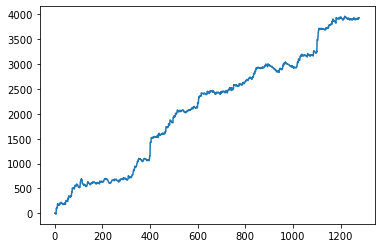

'\n1272\n540\n732\n0.42452830188679247\n3.0742835172985217\n37.55974842767296\n16.84869836215741\n-7.0871700567777225\n59.60925925925926\n21.293715846994534'

In [ ]:
print(count)
print(pc)
print(lc)
print(pc/count)
print((profits/count))
print(tdays/count)
print(avgp/pc)
print(avgl/lc)
print(pdays/pc)
print(ldays/lc)
plt.plot(Y,X)
plt.show()


"""
1272
540
732
0.42452830188679247
3.0742835172985217
37.55974842767296
16.84869836215741
-7.0871700567777225
59.60925925925926
21.293715846994534"""


In [ ]:
print(np.std(loslst))

6.125198931211293


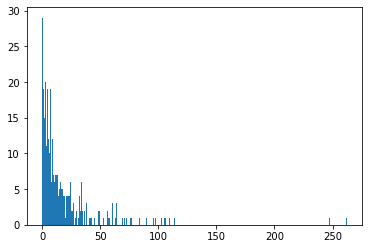

In [ ]:
plt.hist(prolst, bins = 500)
plt.show()

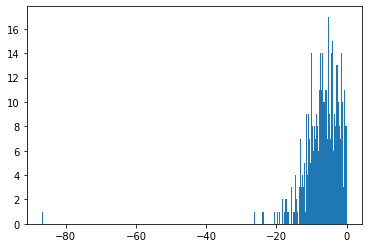

In [ ]:
plt.hist(loslst, bins = 500)
plt.show()

In [ ]:
print(np.std(prolst))
print(np.std(loslst))

24.070599494636497
6.125198931211293


In [ ]:
newest_tickers=[]
for ticker in new_tickers:
    dff=pd.read_csv("SP600/"+ticker+"_10-21.csv")
    if(len(dff)==3013):
        newest_tickers.append(ticker)

In [ ]:
newest_tickers=['AAON', 'AAWW', 'ABCB', 'ABG', 'ABM', 'ACLS', 'ADC', 'ADTN', 'ADUS', 'AEIS', 'AEL', 'AGO', 'AGYS', 'AIN', 'AIR', 'AIT', 'AJRD', 'AKR', 'ALG', 'ALGT', 'AMEH', 'AMN', 'AMSF', 'AMWD', 'ANDE', 'ANF', 'ANGO', 'ANIK', 'ANIP', 'APEI', 'APOG', 'ARCB', 'ARI', 'AROC', 'ARR', 'ASTE', 'ATGE', 'ATI', 'ATNI', 'AVA', 'AVAV', 'AVD', 'AWR', 'AX', 'AXL', 'AZZ', 'B', 'BANC', 'BANF', 'BANR', 'BBBY', 'BCOR', 'BCPC', 'BDN', 'BFS', 'BGS', 'BHE', 'BHLB', 'BIG', 'BJRI', 'BKE', 'BLFS', 'BMI', 'BOOM', 'BRC', 'BRKL', 'CAKE', 'CAL', 'CALM', 'CAMP', 'CASH', 'CATO', 'CBU', 'CCOI', 'CCRN', 'CDMO', 'CELH', 'CENT', 'CENTA', 'CENX', 'CEVA', 'CFFN', 'CHCO', 'CHS', 'CIR', 'CLB', 'CLW', 'CMTL', 'CNK', 'CNMD', 'CNSL', 'CNXN', 'COHU', 'COKE', 'COLB', 'CONN', 'CORT', 'CPE', 'CPF', 'CPK', 'CPSI', 'CRMT', 'CRS', 'CRVL', 'CRY', 'CSGS', 'CSII', 'CSR', 'CTS', 'CUTR', 'CVBF', 'CVCO', 'CVGW', 'CWT', 'CXW', 'CYH', 'CYTK', 'DBD', 'DBI', 'DCOM', 'DDD', 'DGII', 'DHC', 'DIN', 'DIOD', 'DLX', 'DORM', 'DRH', 'DRQ', 'DXPE', 'EAT', 'EBIX', 'EBS', 'ECOL', 'ECPG', 'EGBN', 'EGHT', 'EHTH', 'EIG', 'ENDP', 'ENSG', 'EPAC', 'EPAY', 'EPC', 'ESE', 'ETD', 'EXLS', 'EXPO', 'EXTR', 'EZPW', 'FARO', 'FBC', 'FBNC', 'FBP', 'FCF', 'FDP', 'FELE', 'FFBC', 'FIX', 'FIZZ', 'FMBI', 'FOE', 'FORM', 'FORR', 'FOSL', 'FSP', 'FSS', 'FUL', 'FWRD', 'GBX', 'GCO', 'GEO', 'GES', 'GFF', 'GHL', 'GIII', 'GLT', 'GNW', 'GPI', 'GPRE', 'GTLS', 'GTY', 'GVA', 'HA', 'HAFC', 'HAYN', 'HCI', 'HCSG', 'HFWA', 'HI', 'HIBB', 'HLIT', 'HLX', 'HMN', 'HNGR', 'HNI', 'HOPE', 'HP', 'HSC', 'HSII', 'HSKA', 'HSTM', 'HT', 'HTH', 'HTLD', 'HUBG', 'HVT', 'HWKN', 'HZO', 'IDCC', 'IIIN', 'INDB', 'INT', 'INVA', 'IOSP', 'IPAR', 'IRBT', 'ISBC', 'ITGR', 'ITRI', 'IVR', 'JBSS', 'JBT', 'JJSF', 'JOE', 'KALU', 'KAMN', 'KAR', 'KELYA', 'KFY', 'KLIC', 'KOP', 'KRA', 'KWR', 'LCII', 'LGND', 'LKFN', 'LL', 'LMAT', 'LNN', 'LPSN', 'LQDT', 'LTC', 'LXP', 'LZB', 'MANT', 'MATW', 'MATX', 'MCRI', 'MCS', 'MD', 'MDC', 'MDRX', 'MED', 'MEI', 'MERC', 'MGLN', 'MGPI', 'MHO', 'MLAB', 'MLI', 'MMSI', 'MNRO', 'MODV', 'MOV', 'MPAA', 'MRTN', 'MSEX', 'MTH', 'MTOR', 'MTRN', 'MTRX', 'MYE', 'MYGN', 'MYRG', 'NBR', 'NBTB', 'NEO', 'NFBK', 'NKTR', 'NP', 'NPK', 'NPO', 'NSIT', 'NTCT', 'NTGR', 'NTUS', 'NWBI', 'NWN', 'NX', 'NXGN', 'NYMT', 'ODP', 'OFG', 'OFIX', 'OI', 'OII', 'OIS', 'OMCL', 'OMI', 'ONB', 'OPI', 'OPRX', 'OSIS', 'OSPN', 'OSUR', 'OXM', 'PATK', 'PBH', 'PBI', 'PDCE', 'PDFS', 'PETS', 'PFBC', 'PFS', 'PGTI', 'PIPR', 'PKE', 'PLAB', 'PLCE', 'POLY', 'PLUS', 'PLXS', 'PMT', 'POWL', 'PPBI', 'PRA', 'PRAA', 'PRDO', 'PRFT', 'PRGS', 'PRK', 'PSMT', 'PTEN', 'RCII', 'RDNT', 'RES', 'REX', 'RGP', 'RGR', 'RILY', 'RMBS', 'RNST', 'ROCK', 'ROG', 'ROIC', 'RPT', 'RRC', 'RRGB', 'RUTH', 'RWT', 'SAFT', 'SAH', 'SANM', 'SBCF', 'SBH', 'SBSI', 'SCHL', 'SCL', 'SCSC', 'SCVL', 'SEM', 'SENEA', 'SFNC', 'SHEN', 'SHOO', 'SIG', 'SITC', 'SJI', 'SKT', 'SKYW', 'SLP', 'SM', 'SMP', 'SNBR', 'SNEX', 'SPPI', 'SPTN', 'SPXC', 'SRDX', 'SSP', 'STAR', 'STBA', 'STC', 'STRA', 'SVC', 'SWM', 'SWN', 'SXI', 'TBBK', 'TBI', 'TDS', 'TG', 'TGI', 'THRM', 'THS', 'TILE', 'TMP', 'TNC', 'TR', 'TREE', 'TRMK', 'TRST', 'TTEC', 'TTGT', 'TTMI', 'TUP', 'TVTY', 'TWI', 'TWO', 'UBA', 'UCBI', 'UCTT', 'UEIC', 'UFCS', 'UFI', 'UFPI', 'UHT', 'UIS', 'UNF', 'UNFI', 'USNA', 'USPH', 'UTL', 'UVE', 'UVV', 'VCEL', 'VECO', 'VG', 'VGR', 'VIAV', 'VIVO', 'VNDA', 'VRE', 'VRTS', 'VVI', 'WABC', 'WDFC', 'WETF', 'WGO', 'WIRE', 'WNC', 'WRE', 'WRLD', 'WSFS', 'WTS', 'WW', 'WWW', 'XPER', 'ZEUS', 'ZUMZ', 'ZYXI']

In [ ]:
print(len(newest_tickers))

452


In [ ]:
#simulation trading

In [ ]:
import random
random.shuffle(newest_tickers)

In [ ]:
print(newest_tickers)

['CAL', 'HP', 'EXLS', 'TMP', 'RWT', 'CSGS', 'KFY', 'HZO', 'WSFS', 'PSMT', 'CRMT', 'MPAA', 'KOP', 'ENDP', 'UFI', 'GFF', 'TBI', 'UBA', 'TTGT', 'CPSI', 'DCOM', 'PMT', 'HIBB', 'RDNT', 'POWL', 'SAFT', 'OI', 'UHT', 'NP', 'CVBF', 'UCTT', 'FOE', 'HLX', 'OSUR', 'LXP', 'SEM', 'CNSL', 'SANM', 'WGO', 'GVA', 'ARR', 'SLP', 'PETS', 'HCI', 'SIG', 'PRGS', 'TGI', 'VRTS', 'SJI', 'SCVL', 'CLB', 'HLIT', 'SNBR', 'DDD', 'NFBK', 'PATK', 'LTC', 'HAFC', 'PKE', 'INVA', 'HFWA', 'CELH', 'HAYN', 'WNC', 'FARO', 'MYGN', 'SXI', 'ARCB', 'ATI', 'ABCB', 'FFBC', 'CNMD', 'UNFI', 'MTH', 'RILY', 'B', 'TVTY', 'HSTM', 'THS', 'SITC', 'CSR', 'CBU', 'COHU', 'KRA', 'SBCF', 'BRKL', 'EXPO', 'RMBS', 'HNI', 'ANGO', 'OXM', 'EGBN', 'MD', 'PBI', 'OFG', 'CATO', 'DGII', 'WIRE', 'AIN', 'SBSI', 'HCSG', 'ADC', 'JBSS', 'HI', 'AMSF', 'MSEX', 'SHEN', 'WRLD', 'CPE', 'VG', 'SWM', 'CENT', 'LZB', 'EXTR', 'ACLS', 'ATNI', 'NTGR', 'WABC', 'PLCE', 'KAMN', 'FORR', 'AIR', 'ANIK', 'ANDE', 'VRE', 'JOE', 'USPH', 'SCL', 'ZUMZ', 'RPT', 'USNA', 'FBC', 'UVV', 'B

In [ ]:

n=40
x=120

counter=0
pcounter=0
lcounter=0
profits=[]

loses=[]
pdays=[]
ldays=[]
tlst=[]

trades=[]
indexes=[]

ct=10
ctl=[]

investment_lst=[1]*ct

for i in range(201,3012):
    
    
    new_ctl=[]
    c=0
    for lst in ctl:
        dff=pd.read_csv("SP600/"+lst[0]+"_10-21.csv")
        dff_close=dff['Close'].copy()
        dff_high=dff['High'].copy()
        dff_low=dff['Low'].copy()
        dff_open=dff['Open'].copy()
        dff_date=dff['Date'].copy()
        
        if( dff_low[i]<=np.amin(dff_low[int(i-((n)/2)):i]) or i>len(dff_close)-2) :
            sp=dff_open[i+1]
            tlst.remove(lst[0])
            bp=lst[1]
            
            if(sp>bp):
                print(lst[0]+'  '+dff_date[i+1]+' profit')
                #print('profit')
                #plt.plot(dff_close[lst[2]:i+1])
                #plt.show()
                pcounter+=1
                profits+=[(sp-bp)/bp]
                pdays+=[i-lst[2]]
                #trades+=[((sp-bp)/bp)/ct]
                indexes+=[i]
                
                investment_lst[c]=investment_lst[c]*(1+((sp-bp)/bp))
                trades+=[np.sum(investment_lst)]


                
            else:
                print(lst[0]+'  '+dff_date[i+1]+' loss')
                #print('loss')
                #plt.plot(dff_close[lst[2]:i+1])
                #plt.show()
                lcounter+=1
                loses+=[(sp-bp)/bp]
                ldays+=[i-lst[2]]
                #trades+=[((sp-bp)/bp)/ct]
                indexes+=[i]
                
                investment_lst[c]=investment_lst[c]*(1+((sp-bp)/bp))
                trades+=[np.sum(investment_lst)]
            
        
        else:
            new_ctl+=[lst]
        c+=1
            
    ctl=new_ctl.copy()
            
             
    
    if(len(ctl)<ct):
        for ticker in newest_tickers:
            dff=pd.read_csv("SP600/"+ticker+"_10-21.csv")
            dff_close=dff['Close'].copy()
            dff_high=dff['High'].copy()
            dff_low=dff['Low'].copy()
            dff_open=dff['Open'].copy()
            dff_date=dff['Date'].copy()
            
            if( (ticker not in tlst) and (dff_close[i]-dff_close[i-x])/dff_close[i-x]>0.7 and dff_close[i]>=np.amax(dff_high[i-n:i]) and dff_close[i-1]<np.amax(dff_high[i-1-n:i-1])):
                bp=dff_open[i+1]
                ctl+=[[ticker,bp,i+1]]
                tlst+=[ticker]
                #print(ticker+'  '+dff_date[i+1])
                counter+=1
            
            if(len(ctl)==ct):
                break   


In [ ]:
print(trades)

[-0.014331862760969288, -0.010016556670438732, -0.011333330472310384, -0.007300820551268006, -0.01253465182987978, 0.008573137687159674, 0.005330542281959767, 0.0, -0.006099268794150365, 0.01292845240155623, -0.006106872513642002, 0.001164438353133012, -0.0061138433840199425, -0.014846621079081936, -0.006770833236320541, -0.012413794418861127, 0.02113402032293015, -0.00035789088199013157, -0.0026680897347103917, -0.008523706303902569, -0.01583577671602654, -1.875154086725653e-05, -0.017419351590930193, -0.023396569322389853, -0.003975407084096176, 0.000706567248825511, 0.0258555147655308, 0.008003445045912213, 0.02626132218369211, 0.008715897570417467, -0.0019767449855030623, -0.012238493984719465, -0.013714281717936197, -0.013642752681313755, -0.00859873281288736, -0.011148087367354367, 0.0012987000923330157, 0.03407079082133214, -0.011627042027325438, -0.0033807408659905155, 0.010593580344286981, -0.002281372681820002, -0.011704306123587969, -0.012598420880511729, -0.0038740939805602

In [ ]:
trades10c=[]
tt=0
i=0
mul=1
for vv in trades:
    mul=tt+1
    tt+=vv*mul
    trades10c+=[tt]
    i+=1

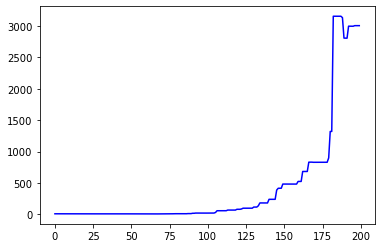

In [ ]:
plt.plot(trades,color='b')
plt.show()

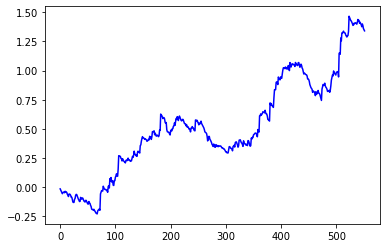

In [ ]:
plt.plot(trades10,color='b')
plt.show()

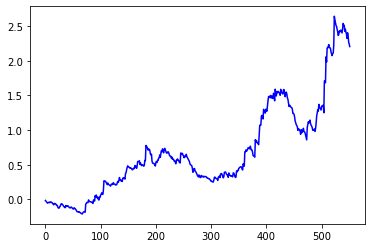

In [ ]:
plt.plot(trades10c,color='b')
plt.show()

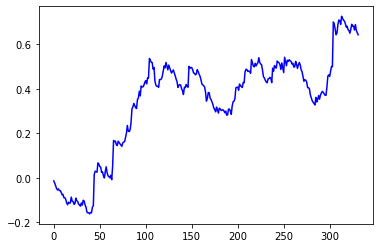

In [ ]:
plt.plot(ttrades,color='b')
plt.show()

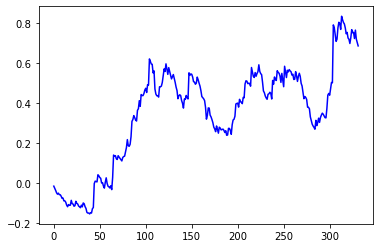

In [ ]:
plt.plot(tttrades,color='b')
plt.show()

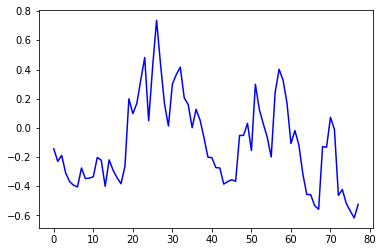

In [ ]:
plt.plot(ttttrades,color='b')
plt.show()

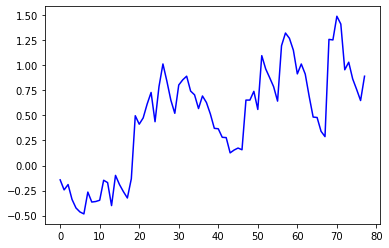

In [ ]:
plt.plot(tttttrades,color='b')
plt.show()